# KNN Homework
# Frances Dai
# fad4yr

## Question 1

In [15]:
# Q1
import numpy as np
import pandas as pd

In [22]:
df = pd.read_csv('./data/USA_cars_datasets.csv')
df = df.loc[:,['price','year','mileage'] ]

In [23]:
df.head()

,price,year,mileage
0,6300,2008,274117
1,2899,2011,190552
2,5350,2018,39590
3,25000,2014,64146
4,27700,2018,6654


In [24]:
print( df.shape )
df.describe()
# There are no NAs to handle because each variable has a count of 2499 which is exactly how many rows there are.

(2499, 3)


,price,year,mileage
count,2499.000000,2499.000000,2.499000e+03
mean,18767.671469,2016.714286,5.229869e+04
std,12116.094936,3.442656,5.970552e+04
min,0.000000,1973.000000,0.000000e+00
25%,10200.000000,2016.000000,2.146650e+04
50%,16900.000000,2018.000000,3.536500e+04
75%,25555.500000,2019.000000,6.347250e+04
max,84900.000000,2020.000000,1.017936e+06


In [25]:
# Q2 Maxmin normalize year and mileage.
def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return(z)
df['year'] = maxmin(df['year'])
df['mileage'] = maxmin(df['mileage'])

df.head()

,price,year,mileage
0,6300,0.744681,0.269287
1,2899,0.808511,0.187194
2,5350,0.957447,0.038892
3,25000,0.872340,0.063016
4,27700,0.957447,0.006537


In [27]:
# Q3 Split the sample into ~80% for training and ~20% for evaluation.
from sklearn.model_selection import train_test_split
 
X = df.drop('price',axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X,y, # feature and target variables
                                                    test_size=.2, #80 / 20 split
                                                    random_state=100)

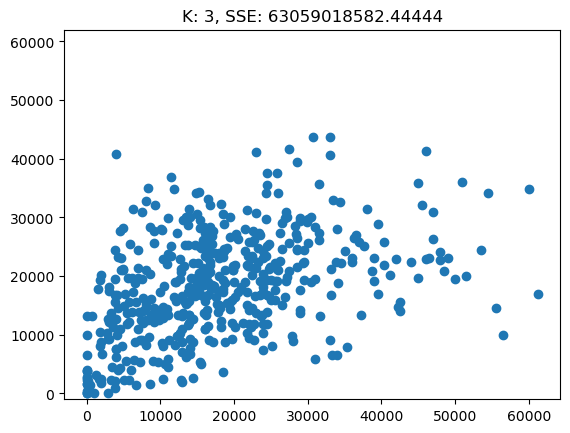

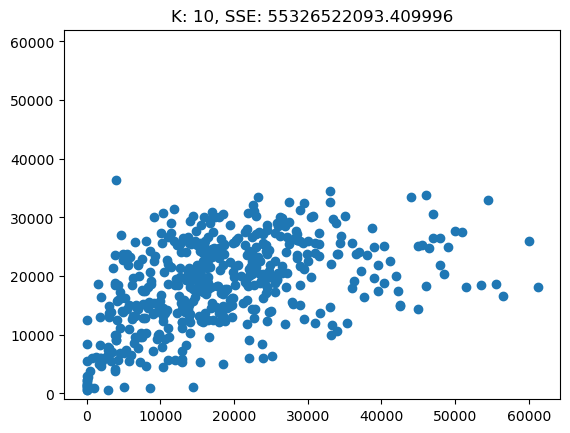

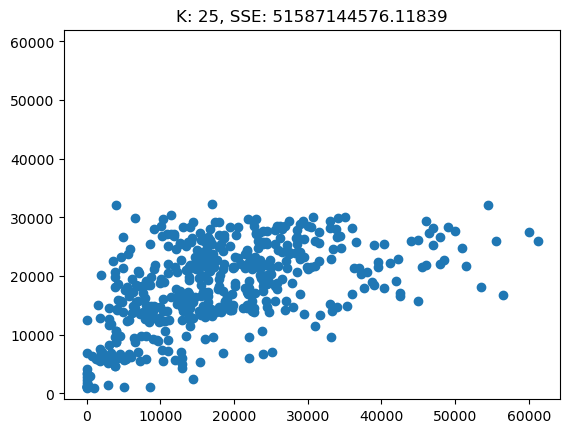

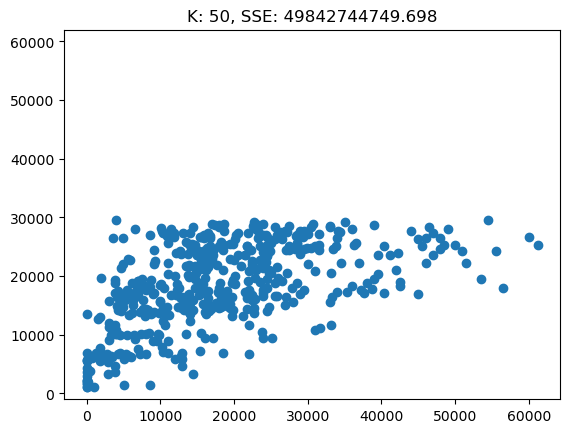

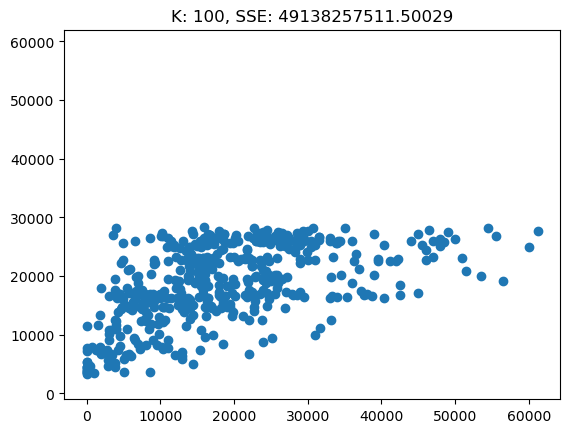

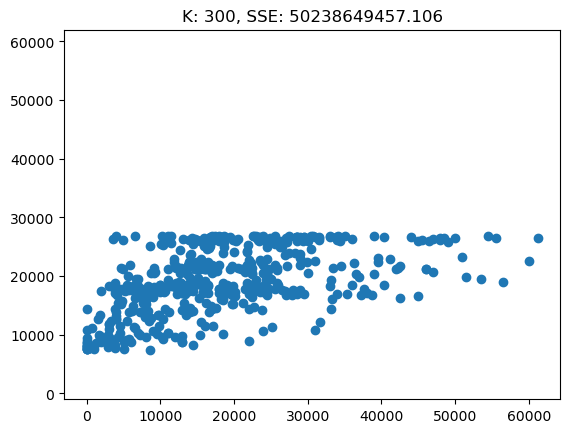

In [45]:
# Q4 - use knn algo for regression and the training data to predict price using year and mileage for the test set for  𝑘=3,10,25,50,100,300
# For each value of  𝑘
# compute the Sum of Squared Error and make a scatterplot showing the test value plotted against the predicted value.
#What patterns do you notice as you increase  𝑘?

from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

testSet = [3, 10, 25, 50, 100, 300]

for k in testSet:
    model = KNeighborsRegressor(n_neighbors=k) #create an sk model for k
    model.fit(X_train,y_train) # train model on data
    y_predicted = model.predict(X_test) # Predict values for test set
    sum_of_sq_error = np.sum( (y_test-y_predicted)**2 ) # subtract predicted from true and square it
    plot, axes = plt.subplots()
    axes.set_ylim(-1000, 62000)
    plt.scatter(y_test,y_predicted)
    plt.title('K: '+ str(k) +', SSE: '+ str(sum_of_sq_error))
    plt.show()


In [36]:
# Q5 Determine the optimal K

k_bar = 200 # num ks to try
SSE = np.zeros(k_bar) # store SSE

for k in range(k_bar):
    fitted_model = KNeighborsRegressor(n_neighbors=k+1) # create an sk model for k 
    fitted_model = fitted_model.fit(X_train,y_train)
    
    y_h = fitted_model.predict(X_test) # predict values for test set
    SSE[k] = np.sum( (y_test-y_h) **2 ) # save the computed SSE for test set
     
min_index = np.where(SSE == np.min(SSE)) # find index for min SSE
k_opt = min_index[0]+1 # Find the optimal value of k
print(k_opt)

[77]


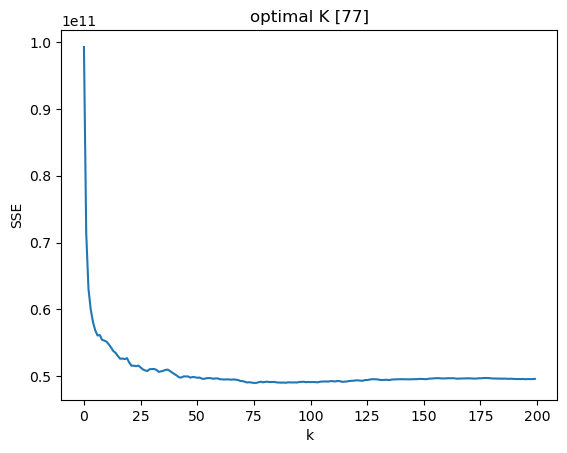

In [38]:
plt.plot(np.arange(0,k_bar),SSE) # Plot SSE by k
plt.xlabel("k")
plt.ylabel("SSE")
plt.title('optimal K ' + str(k_opt))
plt.show()

### Q6 Describe what happened in the plots of predicted versus actual prices as  𝑘  varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)


The optimal value of K is 77 which suggests a good balance between bias and variance. For k values of 3, 10, and 25, the model is underfitting. For smaller k values, there is high variance and low precision in the predictions. A small k value makes the model more sensitive to outliers. However for a k = 300, the model is overfitting. This is because there is a lot of horizontal bunching because the predictions shrink towards average answers and group horizontally. This suggests that with too many neighbors, the model is incorporating noise and fitting the training data too closely, leading to poor predictions. This is happening because of overfitting. For k = 50 and k = 100, the model is relatively stable. 

## Question 2

In [49]:
# Q1
df = pd.read_csv('./data/heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [50]:
print( df.shape )
df.describe()

# No missing values since there are 299 observations/rows and 299 values for each variable.

(299, 13)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [51]:
df = df.drop('time',axis=1)

In [52]:
# Q2
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.004316


The variables serum_creatinine, ejection_fraction, and age have the strongest correlations with a death event with values of 0.294, -0.269, and 0.254 respectively.

In [54]:
# Q3
var_list = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']

for x in var_list:
    print(df.loc[:, [x, 'DEATH_EVENT']].groupby(x).describe())

        DEATH_EVENT                                             
              count      mean       std  min  25%  50%  75%  max
anaemia                                                         
0             170.0  0.294118  0.456991  0.0  0.0  0.0  1.0  1.0
1             129.0  0.356589  0.480859  0.0  0.0  0.0  1.0  1.0
         DEATH_EVENT                                             
               count      mean       std  min  25%  50%  75%  max
diabetes                                                         
0              174.0  0.321839  0.468530  0.0  0.0  0.0  1.0  1.0
1              125.0  0.320000  0.468353  0.0  0.0  0.0  1.0  1.0
                    DEATH_EVENT                                             
                          count      mean       std  min  25%  50%  75%  max
high_blood_pressure                                                         
0                         194.0  0.293814  0.456687  0.0  0.0  0.0  1.0  1.0
1                         105.0  0.37

For the variable 'anaemia' the DEATH_EVENT average in the proportion of the population of those with anaemia is 0.356, while the proportion of those who don't (value = 0) has a mean death_event value of 0.29. Also, for the variable 'high_blood_pressure', the average of death_event in the proportion of the population with high blood pressure (value =1) is 0.371 compared to the 0.294 average for the proportion of the population without high blood pressure.

In [59]:
# Q4
vars_list = ['age', 'ejection_fraction', 'serum_creatinine', 'anaemia', 'high_blood_pressure']
y = df['DEATH_EVENT']
X = df.loc[:, vars_list]

In [60]:
# Q5
def maxim(z):
    z = (z-min(z))/(max(z)-min(z))
    return(z)

X = X.apply(maxmin)

In [64]:
# Q6

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)

np.random.seed(100)
N = X.shape[0]
all = np.arange(1, N)

train = np.random.choice(N, int(N * 0.8)) # random indicies
test = [i for i in all if i not in train]

X_train = X.iloc[train,:]
y_train = y.iloc[train]
X_test = X.iloc[test,:]
y_test = y.iloc[test]

[6]


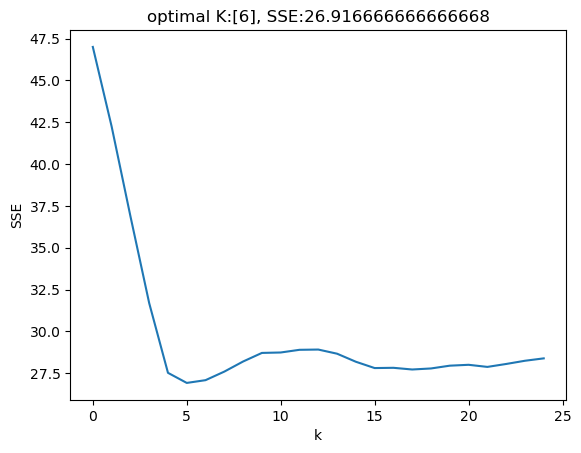

In [66]:
# Q7

from sklearn.neighbors import KNeighborsRegressor

k_bar = 25
k_grid = np.arange(1,k_bar)
SSE = np.zeros(k_bar) 

for k in range(k_bar):
    fitted_model = KNeighborsRegressor(n_neighbors=k+1).fit(X_train,y_train) 
    y_hat = fitted_model.predict(X_test)
    SSE[k] = np.sum((y_test-y_hat)**2) 

k_star = k_grid[np.where( SSE== np.min(SSE)) ] 
print(k_star)


min_SSE = np.min(SSE)
plt.plot(np.arange(0,k_bar),SSE) # Plot accuracy by k
plt.xlabel("k")
plt.title("optimal K:"+ str(k_star) + ', SSE:' + str(min_SSE))
plt.ylabel('SSE')
plt.show()

[83]


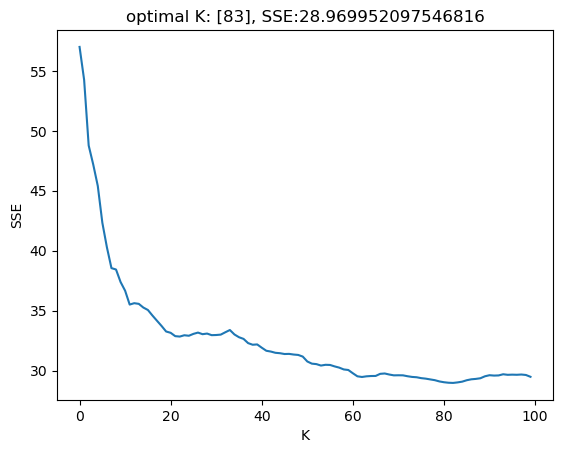

In [67]:
# Q8

X = df.drop('DEATH_EVENT', axis = 1)

X_train = X.iloc[train,:]
X_test = X.iloc[test,:]
y_train = y.iloc[train]
y_test = y.iloc[test]

k_bar = 100
k_grid = np.arange(1, k_bar)
SSE = np.zeros(k_bar)

for k in range(k_bar):
    fitted_model = KNeighborsRegressor(n_neighbors=k+1).fit(X_train.values, y_train)
    y_hat = fitted_model.predict(X_test.values)
    SSE[k] = np.sum((y_test-y_hat)**2)

SSE_min = np.min(SSE)
k_star = k_grid[np.where(SSE == np.min(SSE))]
print(k_star)

plt.plot(np.arange(0,k_bar), SSE) # Plot accuracy by k
plt.xlabel("K")
plt.title("optimal K: " + str(k_star) + ', SSE:' + str(SSE_min))
plt.ylabel('SSE')
plt.show()

More variables is not necessarily better. By using more variables, the knn algorithm produces a higher optimal k value of 83 compared to an optimal k value of 6. The sum of squared error is also higher, with a value of 29 v.s. 27, this means that the predicted values are farther from the true values. Thus, the model with fewer variables has a lower SSE and it would be better to use in practice to predict DEATH_EVENTs. 